# 2) Salary_hike -> Build a prediction model for Salary_hike

## 1.Importing Necessary Libraries

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error
from math import sqrt

## 2.Import Datasets

In [9]:
salary_data = pd.read_csv('Salary_Data.csv')
salary_data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


## 3.Data Understanding

In [11]:
salary_data.shape

(30, 2)

In [12]:
salary_data.dtypes

YearsExperience    float64
Salary             float64
dtype: object

In [13]:
salary_data.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

In [14]:
salary_data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [15]:
salary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [16]:
salary_data.kurtosis()

YearsExperience   -1.012212
Salary            -1.295421
dtype: float64

In [17]:
salary_data.skew()

YearsExperience    0.37956
Salary             0.35412
dtype: float64

array([[<AxesSubplot:title={'center':'YearsExperience'}>,
        <AxesSubplot:title={'center':'Salary'}>]], dtype=object)

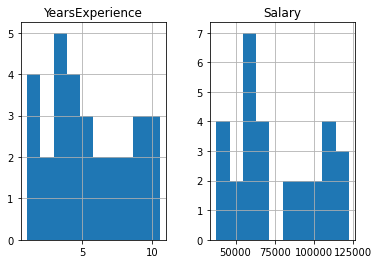

In [18]:
salary_data.hist()

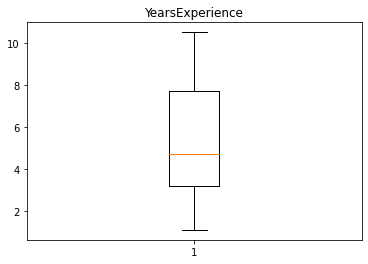

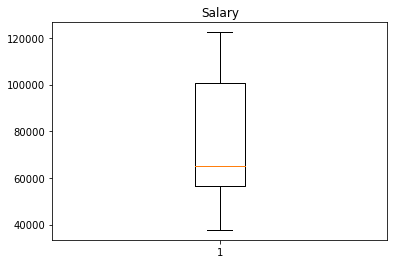

In [30]:
plt.boxplot(x='YearsExperience',data=salary_data,)
plt.title('YearsExperience')
plt.show()
plt.boxplot(x='Salary',data=salary_data)
plt.title('Salary')
plt.show()

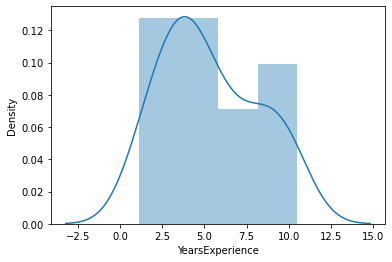

In [31]:
sns.distplot(salary_data['YearsExperience'])
plt.show()

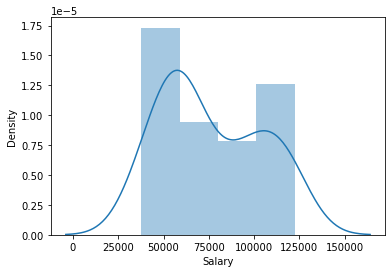

In [32]:
sns.distplot(salary_data['Salary'])
plt.show()

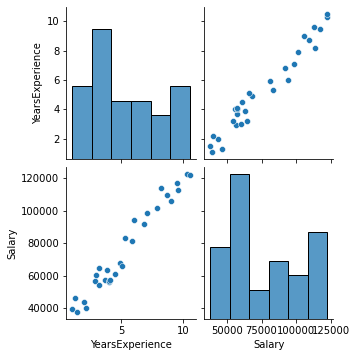

In [33]:
sns.pairplot(data=salary_data)
plt.show()

### We can able to find  that Positive Correlation

## 3[b] Checking the Assumptions

# To check the Linear association with two feautures

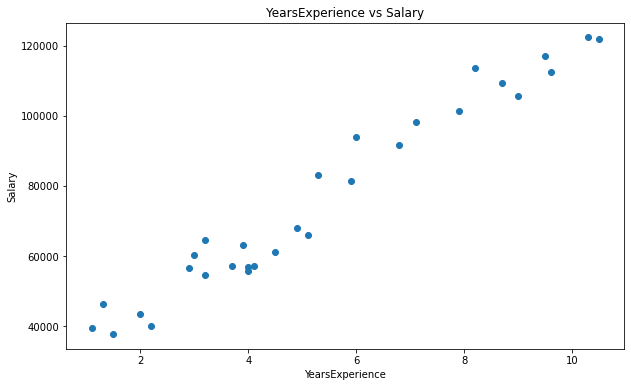

In [34]:
plt.figure(figsize=(10,6))
plt.title('YearsExperience vs Salary')
plt.xlabel('YearsExperience',)
plt.ylabel('Salary')
plt.scatter(x= 'YearsExperience',y= 'Salary',data=salary_data)

In [35]:
salary_data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<AxesSubplot:>

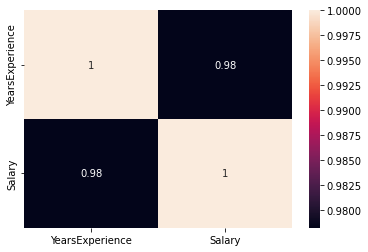

In [36]:
sns.heatmap(salary_data.corr(),annot=True)

<AxesSubplot:title={'center':'YearsExperience vs Salary'}, xlabel='YearsExperience', ylabel='Salary'>

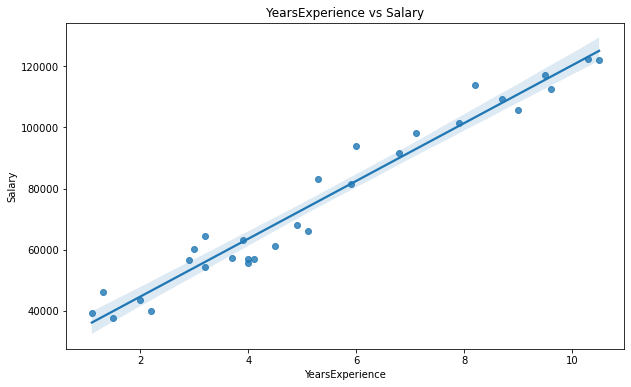

In [37]:
plt.figure(figsize=(10,6))
plt.title('YearsExperience vs Salary')
plt.xlabel('YearsExperience',)
plt.ylabel('Salary')
sns.regplot(x= 'YearsExperience',y= 'Salary',data=salary_data)

## 4.Data Preparation

In [38]:
salary_data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


# MODEL-1 NO TRANSFORMATION

## 5.Model Building || Model Training

In [44]:
model_1 = smf.ols(formula='Salary~YearsExperience', data=salary_data).fit()
model_1

## 6.Model Testing

In [47]:
#Finding Co-efficients
model_1.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [48]:
#Finding tvalues and Pvalues
model_1.tvalues,model_1.pvalues

(Intercept          11.346940
 YearsExperience    24.950094
 dtype: float64,
 Intercept          5.511950e-12
 YearsExperience    1.143068e-20
 dtype: float64)

In [49]:
#Finding Rsquared values
model_1.rsquared,model_1.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

In [45]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Thu, 15 Dec 2022   Prob (F-statistic):           1.14e-20
Time:                        00:06:01   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [88]:
model_1.predict(salary_data['YearsExperience'])

0      36187.158752
1      38077.151217
2      39967.143681
3      44692.124842
4      46582.117306
5      53197.090931
6      54142.087163
7      56032.079627
8      56032.079627
9      60757.060788
10     62647.053252
11     63592.049484
12     63592.049484
13     64537.045717
14     68317.030645
15     72097.015574
16     73987.008038
17     75877.000502
18     81546.977895
19     82491.974127
20     90051.943985
21     92886.932681
22    100446.902538
23    103281.891235
24    108006.872395
25    110841.861092
26    115566.842252
27    116511.838485
28    123126.812110
29    125016.804574
dtype: float64

# MODEL-2 LOG TRANSFORMATION

## Model Building || Model Training

In [60]:
model_2 = smf.ols(formula='Salary~np.log(YearsExperience)', data=salary_data).fit()
model_2

## Model Testing

In [61]:
#Finding Co-efficients
model_2.params

Intercept                  14927.97177
np.log(YearsExperience)    40581.98796
dtype: float64

In [62]:
#Finding tvalues and Pvalues
model_2.tvalues,model_2.pvalues

(Intercept                   2.895135
 np.log(YearsExperience)    12.791989
 dtype: float64,
 Intercept                  7.268813e-03
 np.log(YearsExperience)    3.250155e-13
 dtype: float64)

In [63]:
#Finding Rsquared values
model_2.rsquared,model_2.rsquared_adj

(0.8538888828756969, 0.8486706286926861)

In [64]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Thu, 15 Dec 2022   Prob (F-statistic):           3.25e-13
Time:                        00:16:31   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
np.log(YearsExperience)  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# MODEL-3 SQUARE TRANSFORMATION

## Model Building || Model Training

In [66]:
model_3 = smf.ols(formula='Salary~np.sqrt(YearsExperience)', data=salary_data).fit()
model_3

## Model Testing

In [68]:
#Finding Co-efficients
model_3.params

Intercept                  -16055.769117
np.sqrt(YearsExperience)    41500.680583
dtype: float64

In [69]:
#Finding tvalues and Pvalues
model_3.tvalues,model_3.pvalues

(Intercept                   -3.262308
 np.sqrt(YearsExperience)    19.437148
 dtype: float64,
 Intercept                   2.906965e-03
 np.sqrt(YearsExperience)    8.565358e-18
 dtype: float64)

In [70]:
#Finding Rsquared values
model_3.rsquared,model_3.rsquared_adj

(0.9310009544993526, 0.9285367028743294)

In [71]:
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     377.8
Date:                Thu, 15 Dec 2022   Prob (F-statistic):           8.57e-18
Time:                        00:18:41   Log-Likelihood:                -308.52
No. Observations:                  30   AIC:                             621.0
Df Residuals:                      28   BIC:                             623.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                -1.606e+04   4921.599     -3.262      0.003   -2.61e+04   -5974.331
np.sqrt(YearsExperience)   4.15e+04   2135.122     19.437      0.000    3.71e+04    4.59e+04
==============================================================================
Omnibus:                        0.588   Durbin-Watson:                   1.031
Prob(Omnibus):                  0.745   Jarque-Bera (JB):                0.638
Skew:                           0.011   Prob(JB):                        0.727
Kurtosis:                       2.286   Cond. No.                         9.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# MODEL-4 EXPONENTIAL TRANSFORMATION

## Model Building || Model Training

In [73]:
model_4 = smf.ols(formula='Salary~np.exp(YearsExperience)', data=salary_data).fit()
model_4

## Model Testing

In [74]:
#Finding Co-efficients
model_4.params

Intercept                  67568.624969
np.exp(YearsExperience)        2.136040
dtype: float64

In [75]:
#Finding tvalues and Pvalues
model_4.tvalues,model_4.pvalues

(Intercept                  16.620427
 np.exp(YearsExperience)     5.006889
 dtype: float64,
 Intercept                  4.888835e-16
 np.exp(YearsExperience)    2.721588e-05
 dtype: float64)

In [76]:
#Finding Rsquared values
model_4.rsquared,model_4.rsquared_adj

(0.47238440560728734, 0.45354099152183325)

In [77]:
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.472
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     25.07
Date:                Thu, 15 Dec 2022   Prob (F-statistic):           2.72e-05
Time:                        00:20:33   Log-Likelihood:                -339.03
No. Observations:                  30   AIC:                             682.1
Df Residuals:                      28   BIC:                             684.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                6.757e+04   4065.396     16.620      0.000    5.92e+04    7.59e+04
np.exp(YearsExperience)     2.1360      0.427      5.007      0.000       1.262       3.010
==============================================================================
Omnibus:                        4.567   Durbin-Watson:                   0.202
Prob(Omnibus):                  0.102   Jarque-Bera (JB):                1.966
Skew:                           0.276   Prob(JB):                        0.374
Kurtosis:                       1.874   Cond. No.                     1.05e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# MODEL-5 RECIPROCAL TRANSFORMATION

## Model Building || Model Training

In [79]:
model_5 = smf.ols(formula='Salary~np.reciprocal(YearsExperience)', data=salary_data).fit()
model_5

## Model Testing

In [80]:
#Finding Co-efficients
model_5.params

Intercept                         104273.335111
np.reciprocal(YearsExperience)   -103620.843905
dtype: float64

In [81]:
#Finding tvalues and Pvalues
model_5.tvalues,model_5.pvalues

(Intercept                         18.842323
 np.reciprocal(YearsExperience)    -6.329255
 dtype: float64,
 Intercept                         1.926358e-17
 np.reciprocal(YearsExperience)    7.581006e-07
 dtype: float64)

In [82]:
#Finding Rsquared values
model_5.rsquared,model_5.rsquared_adj

(0.5885951068932687, 0.5739020749965996)

In [83]:
model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.589
Model:                            OLS   Adj. R-squared:                  0.574
Method:                 Least Squares   F-statistic:                     40.06
Date:                Thu, 15 Dec 2022   Prob (F-statistic):           7.58e-07
Time:                        00:22:13   Log-Likelihood:                -335.30
No. Observations:                  30   AIC:                             674.6
Df Residuals:                      28   BIC:                             677.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                       1.043e+05   5533.996     18.842      0.000    9.29e+04    1.16e+05
np.reciprocal(YearsExperience) -1.036e+05   1.64e+04     -6.329      0.000   -1.37e+05   -7.01e+04
==============================================================================
Omnibus:                       10.284   Durbin-Watson:                   0.220
Prob(Omnibus):                  0.006   Jarque-Bera (JB):                2.740
Skew:                           0.290   Prob(JB):                        0.254
Kurtosis:                       1.638   Cond. No.                         5.40
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Conclusion 
## By Comparing R-Squared values of above models, Model 1 having the higher R-squared value of 0.957. Hence the Model-1 is a better model i.e without transformation model to predict Salary


In [89]:
salary_data['Pred_Salary_Time'] = model_1.predict(salary_data['YearsExperience'])
salary_data

,YearsExperience,Salary,Pred_Salary_Time
0,1.1,39343.0,36187.158752
1,1.3,46205.0,38077.151217
2,1.5,37731.0,39967.143681
3,2.0,43525.0,44692.124842
4,2.2,39891.0,46582.117306
5,2.9,56642.0,53197.090931
6,3.0,60150.0,54142.087163
7,3.2,54445.0,56032.079627
8,3.2,64445.0,56032.079627
9,3.7,57189.0,60757.060788


## 8.Model Deployment

In [91]:
from pickle import dump

In [92]:
dump(model_1,open('model_1.pkl','wb'))

In [93]:
from pickle import load

In [94]:
load(open('model_1.pkl','rb'))